# 8/6 EDA

In [1]:
!pip install pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing packages
import pandas as pd
import numpy as np
import openpyxl
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# Reading data
df = pd.read_excel('DATASET DAY 1.xlsx', engine="openpyxl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  3 non-null      object 
 2   Unnamed: 2  0 non-null      float64
 3   TP          86 non-null     object 
 4   TemP (K)    86 non-null     int64  
 5   Time (min)  86 non-null     float64
 6   PS (mm)     85 non-null     float64
 7   BET (m2/g)  86 non-null     float64
 8   PV (cm3)    85 non-null     float64
 9   C (wt.%)    83 non-null     float64
 10  H  (wt.%)   82 non-null     float64
 11  N  (wt.%)   80 non-null     object 
 12  O  (wt.%)   83 non-null     float64
 13  Qm (mg/g)   86 non-null     object 
dtypes: float64(9), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
# clean dropped columns
df = df.drop(["Unnamed: 0", "Unnamed: 1", "Unnamed: 2"], axis=1)
df.head()

,TP,TemP (K),Time (min),PS (mm),BET (m2/g),PV (cm3),C (wt.%),H (wt.%),N (wt.%),O (wt.%),Qm (mg/g)
0,Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,4.4
1,Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,3.8
2,Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,8.5
3,Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,19.6
4,Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,4.3


## 1. Dealing with missing data
#### In this section, we fill NA values with linearly interpolated values

In [5]:
# making sure data are numeric
print(df.info())
df['Qm (mg/g)'][26]=1.39
df['Qm (mg/g)'][42]=238.10
df['N  (wt.%)'][43] = 3.26
df['Qm (mg/g)']= pd.to_numeric(df['Qm (mg/g)'])
df['N  (wt.%)'] = pd.to_numeric(df['N  (wt.%)'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TP          86 non-null     object 
 1   TemP (K)    86 non-null     int64  
 2   Time (min)  86 non-null     float64
 3   PS (mm)     85 non-null     float64
 4   BET (m2/g)  86 non-null     float64
 5   PV (cm3)    85 non-null     float64
 6   C (wt.%)    83 non-null     float64
 7   H  (wt.%)   82 non-null     float64
 8   N  (wt.%)   80 non-null     object 
 9   O  (wt.%)   83 non-null     float64
 10  Qm (mg/g)   86 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 7.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TP          86 non-null     object 
 1   TemP (K)    86 non-null     int64  
 2   Time (min)  86 non-null  

In [6]:
df = df.interpolate(method='linear', limit_direction='forward', axis=0)

In [7]:
df.isna().sum()

TP            0
TemP (K)      0
Time (min)    0
PS (mm)       0
BET (m2/g)    0
PV (cm3)      0
C (wt.%)      0
H  (wt.%)     0
N  (wt.%)     0
O  (wt.%)     0
Qm (mg/g)     0
dtype: int64

## 2. Locating Outliers
#### In this section, we try to locate to outlier of the dataset and remove it

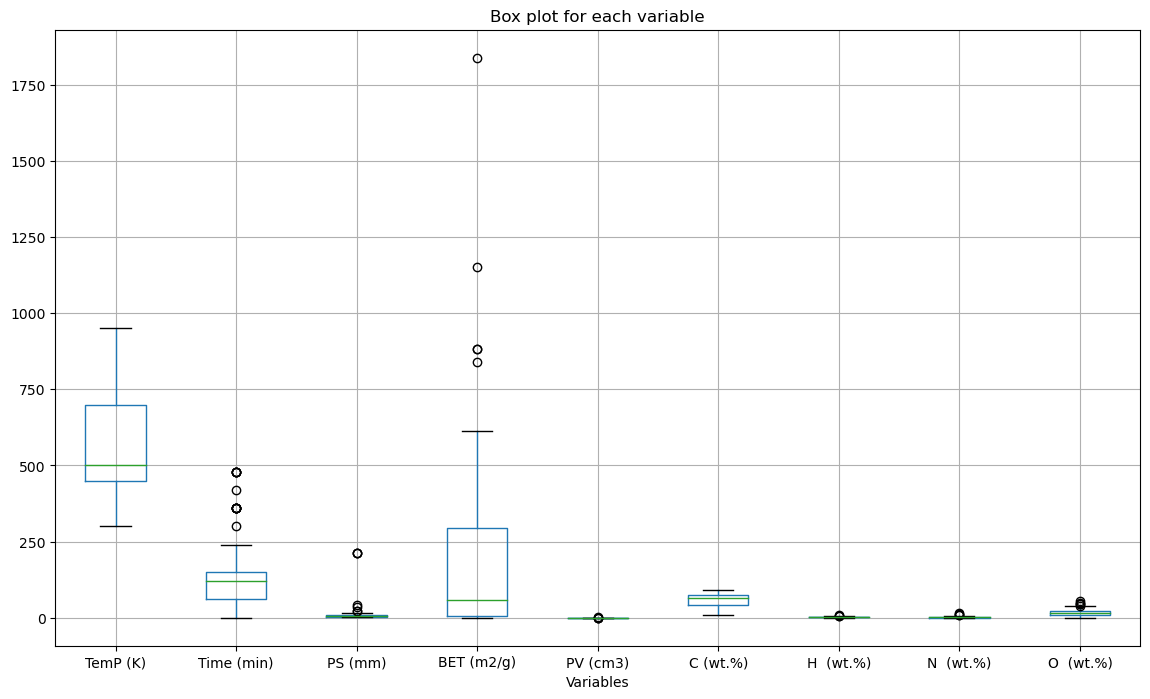

In [8]:
plt.figure(figsize = (14, 8))
df.boxplot(column=['TemP (K)', 'Time (min)', 'PS (mm)', 'BET (m2/g)', 'PV (cm3)',
       'C (wt.%)', 'H  (wt.%)', 'N  (wt.%)', 'O  (wt.%)'])
plt.xlabel('Variables')
plt.title('Box plot for each variable')
plt.show()


In [9]:
df = df[df['PS (mm)']< 200]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 0 to 85
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TP          83 non-null     object 
 1   TemP (K)    83 non-null     int64  
 2   Time (min)  83 non-null     float64
 3   PS (mm)     83 non-null     float64
 4   BET (m2/g)  83 non-null     float64
 5   PV (cm3)    83 non-null     float64
 6   C (wt.%)    83 non-null     float64
 7   H  (wt.%)   83 non-null     float64
 8   N  (wt.%)   83 non-null     float64
 9   O  (wt.%)   83 non-null     float64
 10  Qm (mg/g)   83 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 7.8+ KB


## 3. Heat Map
#### In this section, we try to make a heatmap for the input variables, to locate the important features

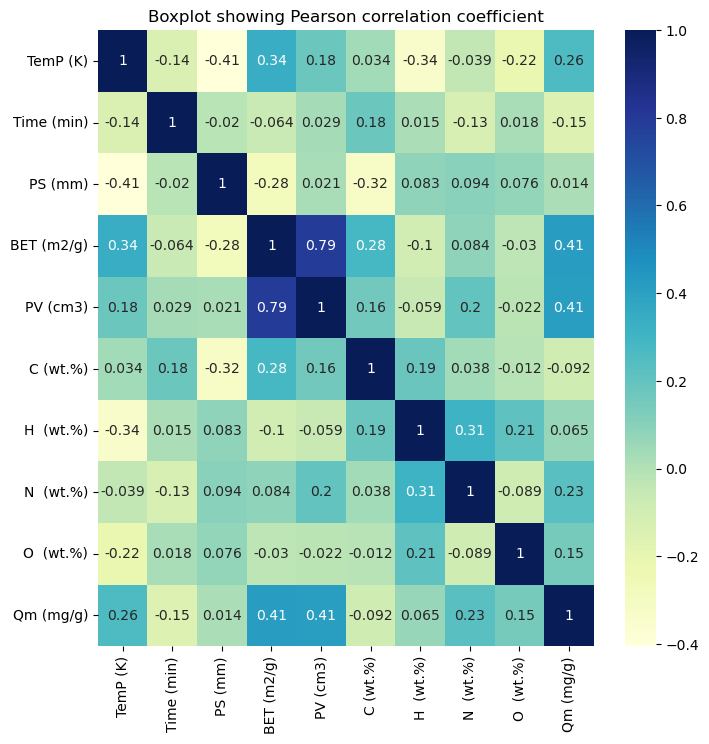

In [11]:
features = df.iloc[:, 1:11]
plt.figure(figsize = (8, 8))
dataplot = sns.heatmap(features.corr(), cmap="YlGnBu", annot=True) 
plt.title('Boxplot showing Pearson correlation coefficient')
plt.show()

There is a high correlation between PV and BET, so we may want to keep one of the to train the mdoel. Besides, C, H and PS have low correlations with Qm. We can run the model with and without these variables to compare the results.

## 4. One hot Encoding
#### In this part, we transformed the categorical column, Types of pharmaceuticals, into numerical values for machine learning tasks.

In [12]:
categorical_columns = ["TP"]
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], join = 'inner', axis=1)
df = df_encoded.drop(categorical_columns, axis=1)
#df= df.dropna(axis=0)
df.head()


,TemP (K),Time (min),PS (mm),BET (m2/g),PV (cm3),C (wt.%),H (wt.%),N (wt.%),O (wt.%),Qm (mg/g),...,TP_Norfloxacin,TP_Oxytetracycline,TP_Oxytetracycline,TP_Salicylic acid,TP_Sulfadiazine,TP_Sulfamethoxazole,TP_Tetracycline,TP_Triclosan,TP_ibuprofen,TP_sulfamethazine
0,315,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,600,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,3.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,800,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,800,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,19.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,800,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,4.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.to_excel('updated_DATASET.xlsx', index=False)

## Principal Component Analysis

The Principal Component Analysis (PCA) is a very important pre-processing step in the Exploratory Data Analysis Phase. The PCA is used to analyze large data sets, reveal the structure of the datasets, analyze, filter out the noise and recognise patterns in the data more easily. The PCA produces a rank of the components that explains which of the cmponents explains the most variance in the dataset.

### Import sci-kit learn principal component analysis

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import art3d
from scipy.stats import chi2

## Read the excel file

In [15]:
# Reading data
df = pd.read_excel('updated_DATASET.xlsx', engine="openpyxl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TemP (K)             80 non-null     int64  
 1   Time (min)           80 non-null     float64
 2   PS (mm)              80 non-null     float64
 3   BET (m2/g)           80 non-null     float64
 4   PV (cm3)             80 non-null     float64
 5   C (wt.%)             80 non-null     float64
 6   H  (wt.%)            80 non-null     float64
 7   N  (wt.%)            80 non-null     float64
 8   O  (wt.%)            80 non-null     float64
 9   Qm (mg/g)            80 non-null     float64
 10  TP_Benzocaine        80 non-null     int64  
 11  TP_Ciprofloxacin     80 non-null     int64  
 12  TP_Citalopram        80 non-null     int64  
 13  TP_Diclofenac        80 non-null     int64  
 14  TP_Dimetridazole     80 non-null     int64  
 15  TP_Floxentine        80 non-null     int64

### Assign the Input and Output/Target Features

In [16]:
# Extract features and target
X = df.iloc[:, :9].values
y = df.iloc[:, 9].values
feature_names = df.columns[:8]

In [17]:
print(y.shape)

(80,)


### Standardize the Input data. Standardization scales the data to have a mean and variance of zero

In [18]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Indicate the number of principal components desired

In [19]:
# Apply PCA
pca = PCA(n_components=5)  # Reduce to 3 components for visualization
principal_components = pca.fit_transform(X_standardized)

### Create a visualization for the principal components

In [20]:
# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5'])
df_pca['Target'] = y

### Get Eigen values they describe the amount of variance explained by each Principal Components

In [21]:
# Calculate the loadings (eigenvectors)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

### The Scree plot helps in the decision of the number of Principal Components to retain

In [22]:
# Scree plot
pca_full = PCA().fit(X_standardized)
explained_variance_ratio = pca_full.explained_variance_ratio_
eigenvalues = pca_full.explained_variance_

### Visualization of the Screeplot

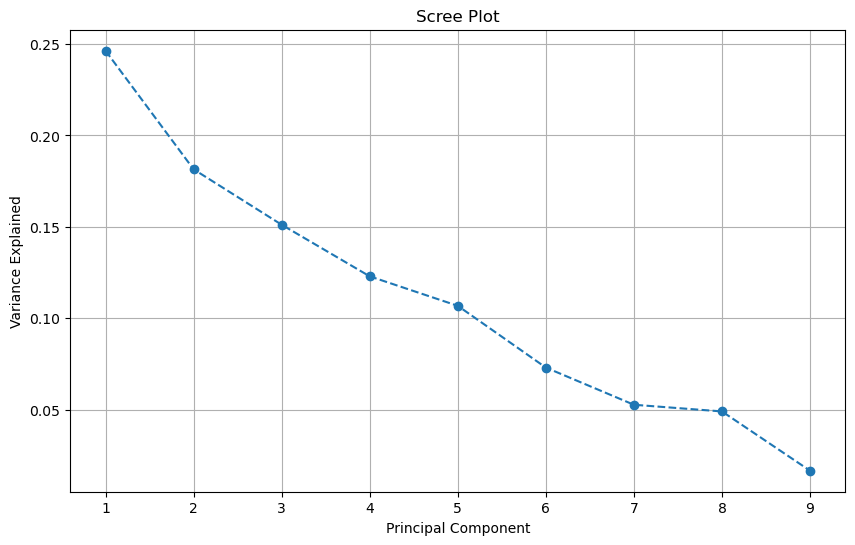

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()

### Print out the Eigen values

In [24]:
# Print eigenvalues
print("Eigenvalues:")
print(eigenvalues)

Eigenvalues:
[2.24487755 1.65396844 1.37756283 1.12036636 0.97329834 0.66553608
 0.48014226 0.44682955 0.15134264]


### Export the Principal Components

In [25]:
# Export the first three principal components with the target value to an Excel sheet
export_df = df_pca[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Target']]
export_df.to_excel('pca_output.xlsx', index=False)


### Create a 3D Scatterplot

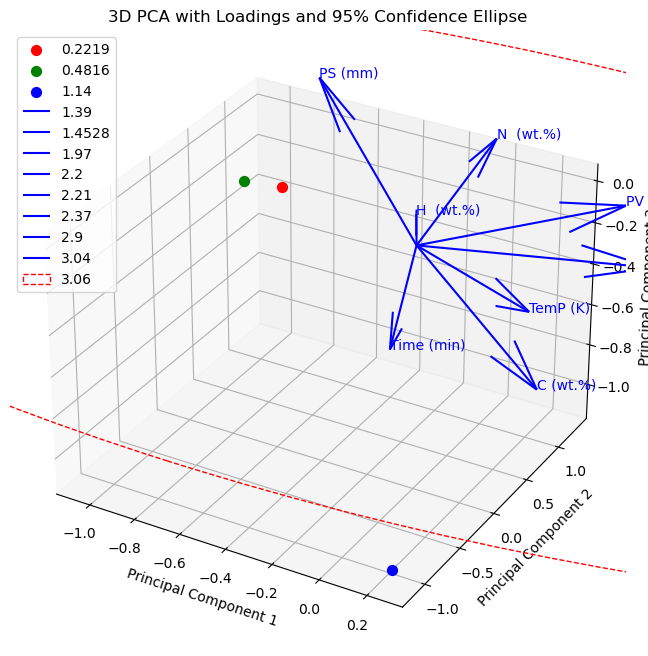

PCA Result DataFrame:
    Principal Component 1  Principal Component 2  Principal Component 3  \
0               -2.000514               0.030355               0.372128   
1               -0.391112              -1.404552               0.567417   
2                0.240245              -2.075945               0.736841   
3                0.512721              -1.972988               0.413711   
4                0.169497              -2.256788               1.115380   
..                    ...                    ...                    ...   
75               1.868152               0.212336              -0.660071   
76               2.055682               0.534984              -0.580960   
77              -2.319467               1.759715               3.089831   
78              -1.974842               1.503460               2.729754   
79               1.487722              -0.967544              -0.178929   

    Principal Component 4  Principal Component 5   Target  
0                

In [26]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the principal components
targets = np.unique(y)
colors = ['r', 'g', 'b']  # Update this based on the number of unique targets
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    ax.scatter(df_pca.loc[indices_to_keep, 'Principal Component 1'],
               df_pca.loc[indices_to_keep, 'Principal Component 2'],
               df_pca.loc[indices_to_keep, 'Principal Component 3'],
               c=color,
               s=50,
               label=target)
# Plot the loadings
for i, (loading, name) in enumerate(zip(loadings, feature_names)):
    ax.quiver(0, 0, 0, loading[0], loading[1], loading[2], color='b', linewidth=1.5)
    ax.text(loading[0], loading[1], loading[2], name, color='b')

# Plot the 95% confidence ellipse
# We will plot the ellipse in the space of the first two principal components
pca_2d = PCA(n_components=2).fit_transform(X_standardized)
chi_square_value = chi2.ppf(0.95, 2)
radii = np.sqrt(chi_square_value * np.var(pca_2d, axis=0))
ellipse = mpatches.Ellipse((0, 0), width=2 * radii[0], height=2 * radii[1], edgecolor='r', facecolor='none', linestyle='--')

ax.add_patch(ellipse)
art3d.pathpatch_2d_to_3d(ellipse, z=0, zdir="z")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA with Loadings and 95% Confidence Ellipse')
ax.legend(targets)
plt.show()

# Display the PCA DataFrame
print("PCA Result DataFrame:")
print(df_pca)
